In [0]:
## Load the Drive helper and mount
from google.colab import drive

## This will prompt for authorization.
drive.mount('/content/drive')

In [0]:
## Set the preferred path
%cd drive/My' 'Drive/Google' 'Colab

In [0]:
## Read and display the output classes
f = open ("classes", "r")
out_classes = f.readlines()
f.close()
for i in range(0, len(out_classes)):
  out_classes[i] = out_classes[i].replace('\n', '').replace(' ', '_')
print(out_classes)

In [0]:
## Define a function to download the dataset
def obtain_dataset():
  
  import urllib.request
  base_url = "https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/"
  extensions = [''] * len(out_classes)
  
  for i in range(0, len(out_classes)):
    ## Create URL
    extensions[i] = out_classes[i].replace('_', '%20')
    url = base_url + extensions[i] + ".npy"
    ## Fetch...
    print ("downloading " + url + " ..." )
    urllib.request.urlretrieve(url, "dataset/" + out_classes[i] + ".npy")

In [0]:
## Fetch the dataset
%mkdir dataset
obtain_dataset()

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [0]:
%cd dataset
print ("\n")
%ls

In [0]:
def load_dataset():
  ## Initialize variables
  X = np.empty([0, 784])
  Y = np.empty([0, 1])
  images_per_class = 18000
  test_set_size = 10000
  
  ## Load the dataset
  for i in range(0, len(out_classes)):
    file = np.load((out_classes[i] + ".npy"))    # Load images of a given doodle
    file = file[0 : images_per_class, :]         # Select the first 18000 images
    labels = np.full((images_per_class, 1), i)   # Create labels for the given doodle
    
    X = np.concatenate((X, file), axis = 0)   # Concatenate examples for each doodle
    Y = np.concatenate((Y, labels), axis = 0) # Concatenate the labels
  
  ## Randomise the dataset
  np.random.seed(1)
  order = np.random.permutation(Y.shape[0])
  X = X[order, :]
  Y = Y[order, :]
  
  ## Split the data
  X_test = X[0 : test_set_size, :]
  Y_test = Y[0 : test_set_size, :]
  X_train = X[test_set_size : X.shape[0], :]
  Y_train = Y[test_set_size : Y.shape[0], :]
  
  return X_train, Y_train, X_test, Y_test

In [0]:
## Load the dataset
X_train, Y_train, X_test, Y_test = load_dataset()

In [0]:
## Perform sanity check
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

donut


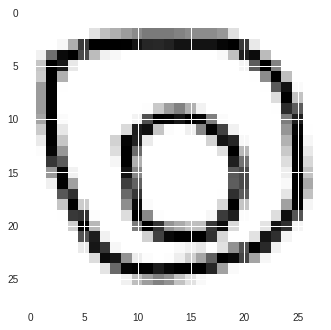

In [0]:
## Print an image
ind = 750
plt.imshow(X_train[ind].reshape(28, 28))
print(out_classes[int(Y_train[ind])])

In [0]:
## Reshape image vectors
image_size = 28
X_train = X_train.reshape(X_train.shape[0], image_size, image_size, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], image_size, image_size, 1).astype("float32")

## Reshape output labels
Y_train = keras.utils.to_categorical(Y_train, len(out_classes))
Y_test = keras.utils.to_categorical(Y_test, len(out_classes))

## Normalize the dataset
X_train = X_train / 255
X_test = X_test / 255

In [0]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

In [0]:
def create_model(input_shape):
  model = keras.Sequential()
  
  model.add(layers.Conv2D(16, (3, 3), padding = 'same', input_shape = input_shape, activation = 'relu'))
  model.add(layers.BatchNormalization(axis = 3)) # Normalizing the channel axis
  model.add(layers.MaxPooling2D(pool_size = (2, 2)))
  
  model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
  model.add(layers.BatchNormalization(axis = 3))
  model.add(layers.MaxPooling2D(pool_size = (2, 2)))
  
  model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
  model.add(layers.BatchNormalization(axis = 3))
  model.add(layers.MaxPooling2D(pool_size = (2,2)))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation = 'relu'))
  model.add(layers.Dense(28, activation = 'softmax')) 
  
  return model

In [0]:
## Create the model
doodle_model = create_model((image_size, image_size, 1))
print (doodle_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
__________

In [0]:
## Compile the model
doodle_model.compile (optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [0]:
## Fit the model
doodle_model.fit (x = X_train, y = Y_train, epochs = 4, batch_size = 256)

In [0]:
preds = doodle_model.evaluate(x = X_test, y = Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

10000/10000 [==============================] - 1s 99us/step

Loss = 0.30474953777194025
Test Accuracy = 0.9218


['ladder']


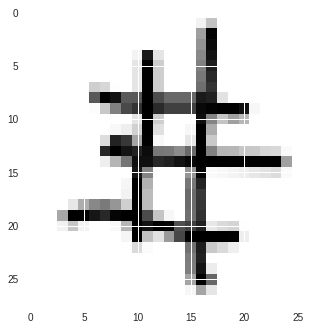

In [0]:
idx = 47
img = X_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = np.argmax(pred)
prediction = out_classes[ind]
print(prediction)

In [0]:
%cd ..

/content/drive/My Drive/Google Colab


In [0]:
## Save the model
doodle_model.save("my_model.h5")